In [23]:
import librosa
import sklearn
import librosa.display
import matplotlib.pylab as plt
import IPython.display as ipd

### Choose audio

In [24]:
audio_path = '../data/healthy/1-a_n.wav'
x, sr = librosa.load(audio_path)

In [25]:
ipd.Audio(audio_path)

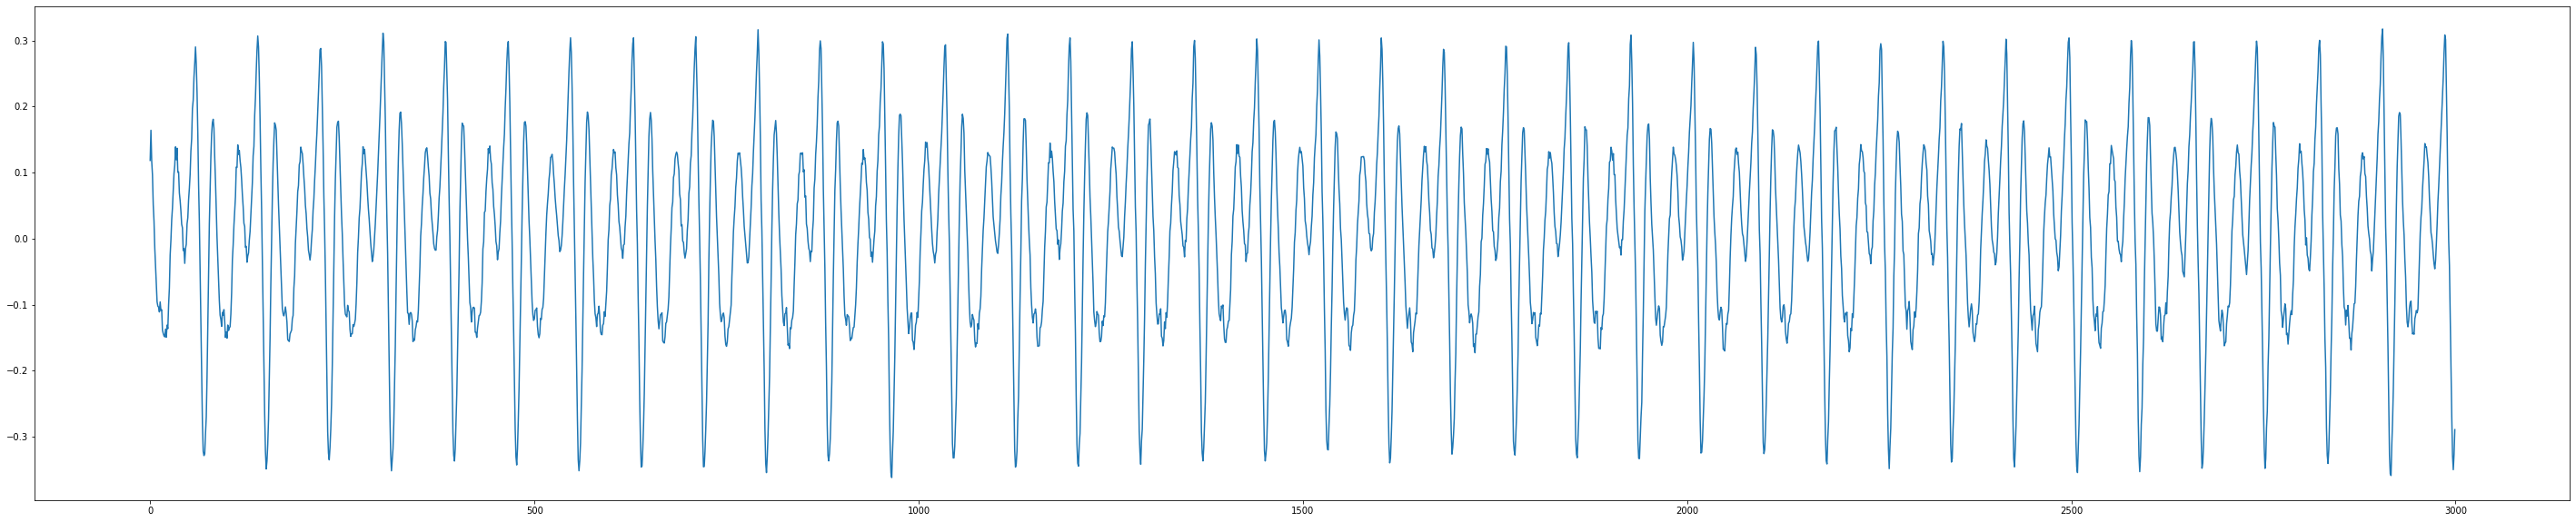

In [26]:
plt.figure(figsize=(50, 10))
plt.plot(x[0:3000])

### Spectral features

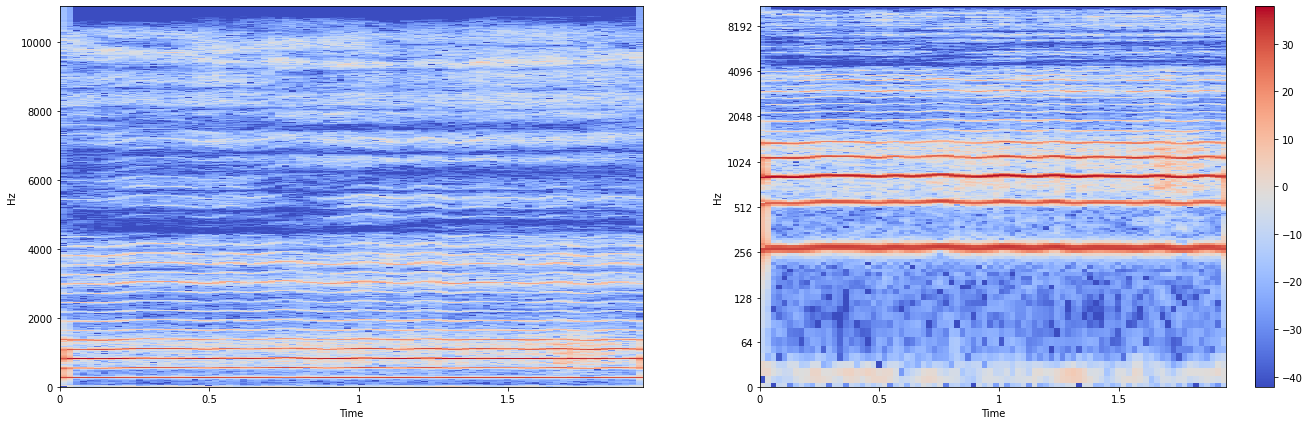

In [27]:
x_fourier = librosa.stft(x)
x_db = librosa.amplitude_to_db(abs(x_fourier))
plt.figure(figsize=(23, 7))
plt.subplot(1, 2, 1)
librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
plt.subplot(1, 2, 2)
librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [28]:
spectral_centroid = librosa.feature.spectral_centroid(x, sr=sr)[0]

In [29]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]

In [30]:
def plot_normalized(array):
    frames = range(len(array))
    t = librosa.frames_to_time(frames)

    normalized = sklearn.preprocessing.minmax_scale(array, axis=0)

    librosa.display.waveplot(x, sr=sr, alpha=0.8)
    plt.plot(t, normalized, color='r')
    plt.show()

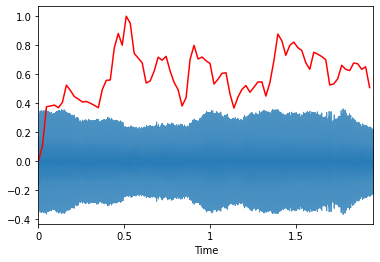

In [31]:
plot_normalized(spectral_centroid)

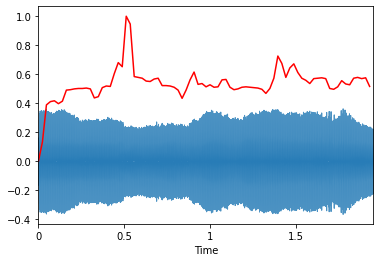

In [32]:
plot_normalized(spectral_rolloff)

(20, 84)


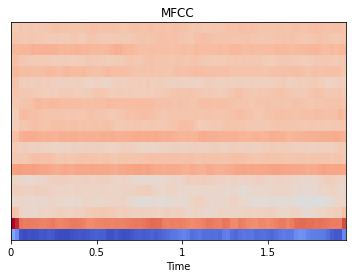

In [33]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
plt.title('MFCC')
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

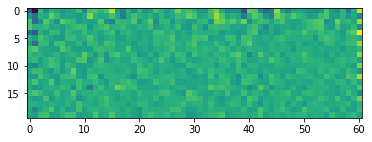

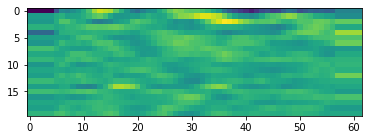

In [47]:
delta = librosa.feature.delta(mfccs)
import numpy as np
plt.imshow(np.diff(mfccs, axis=1))
plt.figure()
plt.imshow(delta)

### Example of unhealthy signal

In [35]:
audio_path = '../data/unhealthy/155-a_n.wav'
x, sr = librosa.load(audio_path)

In [36]:
sr

22050

In [37]:
ipd.Audio(audio_path)

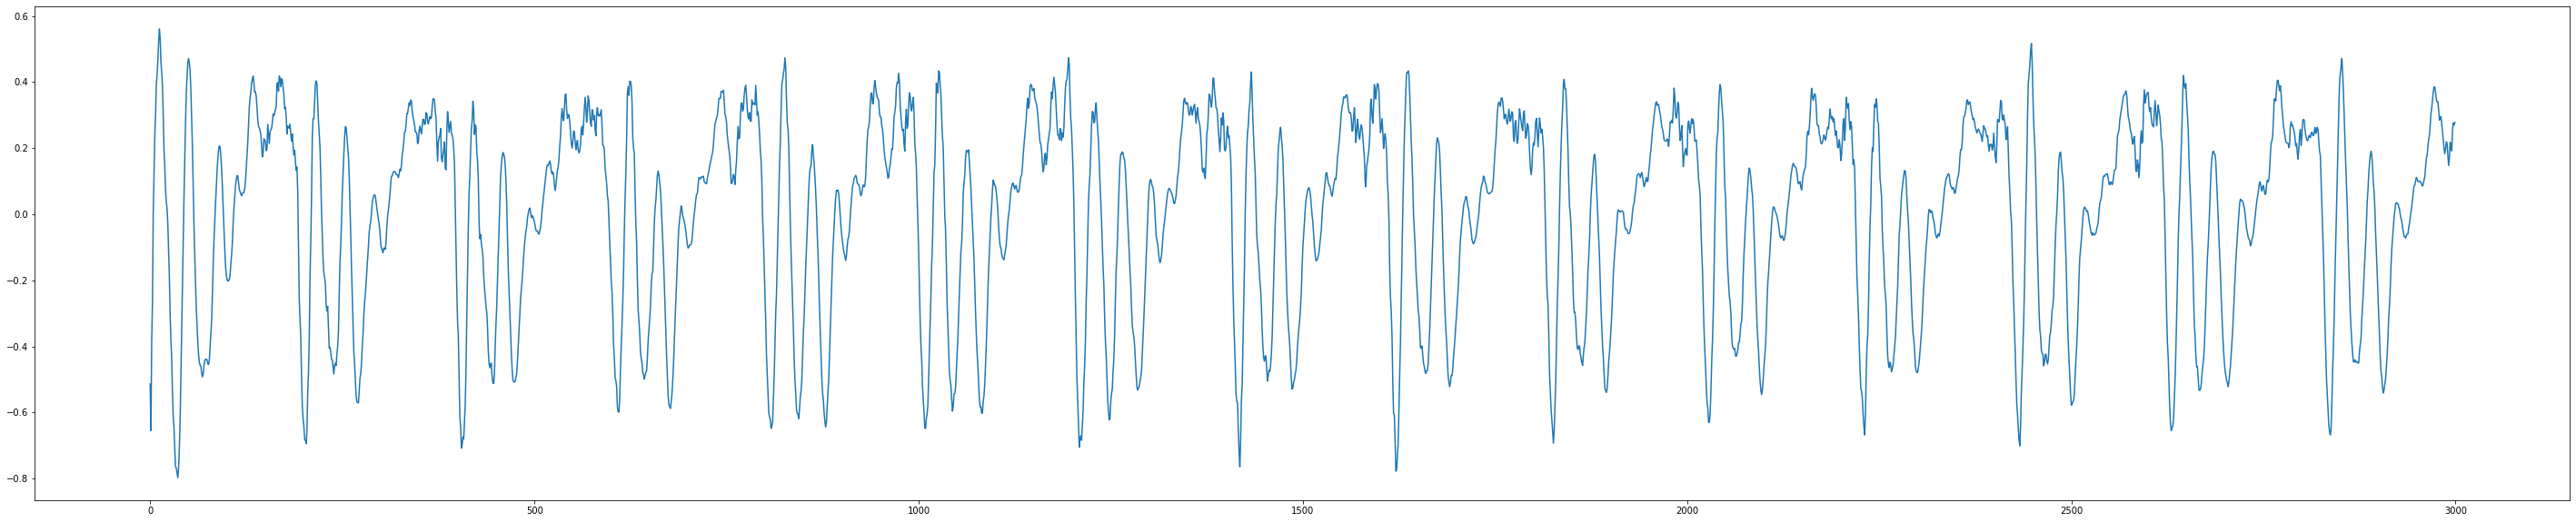

In [38]:
plt.figure(figsize=(50, 10))
plt.plot(x[0:3000])

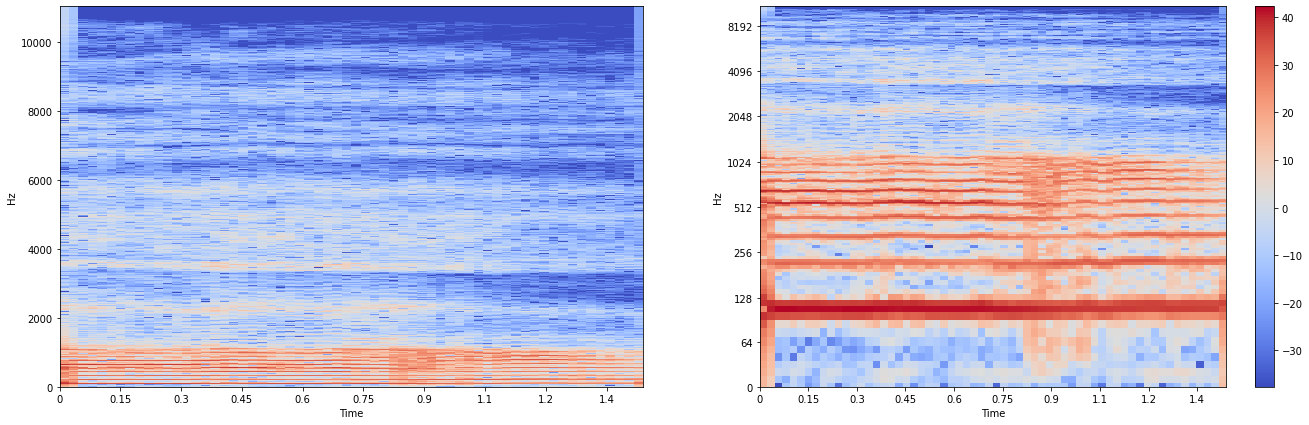

In [39]:
x_fourier = librosa.stft(x)
x_db = librosa.amplitude_to_db(abs(x_fourier))
plt.figure(figsize=(23, 7))
plt.subplot(1, 2, 1)
librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
plt.subplot(1, 2, 2)
librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [40]:
spectral_centroid = librosa.feature.spectral_centroid(x, sr=sr)[0]

In [41]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]

In [42]:
def plot_normalized(array):
    frames = range(len(array))
    t = librosa.frames_to_time(frames)

    normalized = sklearn.preprocessing.minmax_scale(array, axis=0)

    librosa.display.waveplot(x, sr=sr, alpha=0.6)
    plt.plot(t, normalized, color='r')
    plt.show()

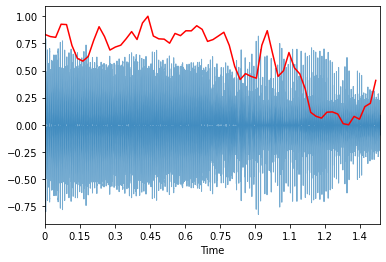

In [43]:
plot_normalized(spectral_centroid)

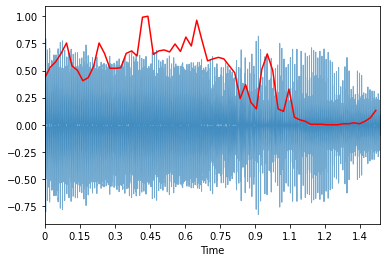

In [44]:
plot_normalized(spectral_rolloff)

(20, 62)


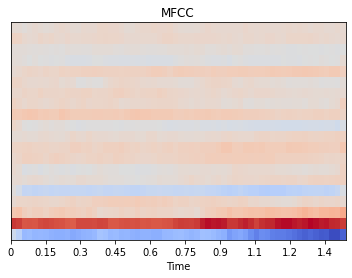

In [45]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
plt.title('MFCC')
librosa.display.specshow(mfccs, sr=sr, x_axis='time')